In [1]:
import sys

import numpy as np

sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")

In [2]:
from workflow.external.gtdb_metadata import GtdbMetadataR207
from workflow.gunc_helper.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged
import pandas as pd
from collections import defaultdict
from workflow.fastani_contig_split.b_run_fastani import FastAniContigSplitRunFastAni
from workflow.fastani_contig_split.d_report_results import FastAniContigSplitReportResultsFastAni
from workflow.fastani_contig_split.d_report_results_relaxed import FastAniContigSplitReportResultsFastAniRelaxed
from tqdm import tqdm
import numpy as np

DEBUG = True (uqamussi.vpn.uq.edu.au)


In [10]:
DF_ANI_RELAXED = FastAniContigSplitReportResultsFastAniRelaxed().output().maybe_read_cached()
DF_ANI_RELAXED.head()

,gid,expected_tax,keep_tax,disc_tax,keep_rank_agree,disc_rank_agree,keep_sp_rep,disc_sp_rep,keep_ani,disc_ani,keep_af,disc_af,keep_type,disc_type,keep_same_as_207,disc_same_as_207,keep_same_as_disc
0,GCA_000143435.1,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,s,s,GCF_001435955.1,GCF_001435955.1,97.3962,97.3042,0.8174,0.7677,sp_rep,sp_rep,True,True,True
1,GCA_000153745.1,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,g,g,GCA_900197625.1,GCA_900197625.1,84.4333,83.7779,0.7565,0.6990,sp_rep,sp_rep,False,False,True
2,GCA_000155005.1,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,NaN,s,NaN,GCF_003697165.2,NaN,96.5879,0.0000,0.7680,0.0000,sp_rep,no_af,True,False,False
3,GCA_000161815.1,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,s,s,GCF_001681715.1,GCF_001681715.1,97.1446,96.9094,0.9309,0.8098,sp_rep,sp_rep,True,True,True
4,GCA_000166735.2,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,g,g,GCF_000166715.1,GCF_000166715.1,93.9347,93.6488,0.9567,0.6866,sp_rep,sp_rep,False,False,True


In [3]:

DF_ANI_RAW = FastAniContigSplitRunFastAni().output().maybe_read_cached()
DF_ANI_RAW.head()

[17/06/2023 15:07:30] - 320.9MiB = /srv/home/uqamussi/projects/gunc-chimeras/output/fastani_contig_split/ani_k16_s5000__p50.h5 -> /tmp/gunc-cache/srv/home/uqamussi/projects/gunc-chimeras/output/fastani_contig_split/ani_k16_s5000__p50.h5


,query,ref,ani,af,ani_qvr,ani_rvq,af_qvr,af_rvq
0,GCA_000143435.1,GCF_001435955.1,97.3962,0.817416,97.3962,97.1850,0.817416,0.456693
1,GCA_000143435.1,GCF_000615845.1,79.4643,0.241573,79.4487,79.4643,0.241573,0.168605
2,GCA_000143435.1_C,GCF_001435955.1,97.3042,0.767705,97.3042,97.1129,0.767705,0.429921
3,GCA_000143435.1_C,GCF_000615845.1,79.5371,0.240793,79.5245,79.5371,0.240793,0.168605
4,GCA_000153745.1,GCA_000153745.1,99.9945,0.997382,99.9945,99.9906,0.997382,0.500000


In [4]:
DF_META = GtdbMetadataR207().output().read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [5]:
DF_CSS = AggregateMaxCssLevelMerged().output().read_cached()
DF_CSS.head()

,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [6]:
BAC_NON_SP_REPS = set(DF_META[(DF_META['gtdb_representative'] == 'f') & (DF_META['domain'] == 'd__Bacteria')].index)
print(list(BAC_NON_SP_REPS)[0:10])
print(len(BAC_NON_SP_REPS))

['GCF_009768635.1', 'GCF_900504865.1', 'GCA_001780345.1', 'GCF_015704295.1', 'GCF_000580495.1', 'GCF_001886035.1', 'GCF_000740485.1', 'GCF_000583855.1', 'GCF_002098515.1', 'GCF_016810635.1']
249189


In [7]:
FAIL_GIDS = set(DF_CSS.index)
print(len(FAIL_GIDS))

35723


In [8]:
FAIL_NON_BAC_SP_REPS = FAIL_GIDS.intersection(BAC_NON_SP_REPS)
print(len(FAIL_NON_BAC_SP_REPS))

30321


In [9]:
ANI_NEW_SP = {'GCA_001509115.1', 'GCA_001695755.1', 'GCA_002728285.1', 'GCA_002731855.1', 'GCA_008668585.1', 'GCA_008668795.1', 'GCA_009493725.1', 'GCA_011523145.1', 'GCA_016707075.1', 'GCA_017394825.1', 'GCA_017465765.1', 'GCA_017515185.1', 'GCA_018056875.1', 'GCA_018239885.1', 'GCA_018363345.1', 'GCA_900759525.1', 'GCA_900761055.1', 'GCA_900765305.1', 'GCA_900765645.1', 'GCA_902528895.1', 'GCA_902593295.1', 'GCA_903846615.1', 'GCA_903931905.1', 'GCA_905200745.1', 'GCA_905214645.1', 'GCF_000698005.1', 'GCF_002929465.1'}

ANI_NEW_CLST = {'GCA_002291775.1', 'GCA_002703565.1', 'GCA_003487585.1', 'GCA_007096555.1', 'GCA_011523095.1', 'GCA_013213925.1', 'GCA_016939315.1', 'GCA_018370815.1', 'GCA_018383955.1', 'GCA_900548685.1', 'GCA_900549575.1', 'GCA_900756095.1', 'GCA_900760075.1', 'GCA_902363945.1', 'GCA_902388545.1', 'GCA_902539685.1', 'GCA_902568005.1', 'GCA_902573475.1', 'GCA_902619155.1', 'GCA_905193315.1', 'GCA_905208535.1', 'GCA_905212495.1', 'GCA_905214135.1', 'GCA_905214255.1', 'GCA_905215365.1', 'GCF_000964075.1', 'GCF_001812365.1', 'GCF_001815585.1', 'GCF_002035805.1', 'GCF_002835625.1', 'GCF_002912425.1', 'GCF_002913635.1', 'GCF_003462845.1', 'GCF_003495765.1', 'GCF_008269775.1', 'GCF_009493905.1', 'GCF_009494015.1', 'GCF_009649595.1', 'GCF_014284905.1', 'GCF_015667745.1', 'GCF_016806285.1', 'GCF_016806405.1', 'GCF_017151305.1', 'GCF_018499505.1', 'GCF_902845755.1'}

print(len(ANI_NEW_SP), print(len(ANI_NEW_CLST)))
ALL_DIFF = ANI_NEW_SP.union(ANI_NEW_CLST)

ANI_NO_CHANGE = FAIL_NON_BAC_SP_REPS - ALL_DIFF
print(len(ANI_NO_CHANGE))

45
27 None
30249


In [ ]:
## Calculate the average radius of the species clusters



In [10]:
def get_gid_to_ani_raw_res():
    out = defaultdict(list)
    for row in tqdm(DF_ANI_RAW.itertuples(), total=len(DF_ANI_RAW)):
        out[row.query].append(row)
    return out
D_GID_TO_ANI_RAW_RES = get_gid_to_ani_raw_res()

100%|██████████| 7744454/7744454 [00:18<00:00, 407876.29it/s]


In [11]:
D_GID_TO_TAX = DF_META['gtdb_taxonomy'].to_dict()

In [12]:


def get_for_set(input_set, af_limit, genus_only):
    out = list()
    for gid in tqdm(input_set):
        df_rows = D_GID_TO_ANI_RAW_RES[gid]
        gid_tax = D_GID_TO_TAX[gid]
        gid_genus = gid_tax.split(';')[5].split('__')[1]
        for row in df_rows:
            ref_tax = D_GID_TO_TAX[row.ref]
            ref_genus = ref_tax.split(';')[5].split('__')[1]

            if genus_only and gid_genus != ref_genus:
                continue
            if row.af < af_limit:
                continue
            out.append(row.ani)
    return out



In [13]:
af_limit = 0.5
genus_only = True

new_sp = get_for_set(ANI_NEW_SP, af_limit, genus_only)
new_clst = get_for_set(ANI_NEW_CLST, af_limit, genus_only)
no_change = get_for_set(ANI_NO_CHANGE, af_limit, genus_only)

print(len(new_sp), len(new_clst), len(no_change))

100%|██████████| 30249/30249 [00:02<00:00, 10115.18it/s]

1420 5611 447551


In [14]:

new_sp_mean = np.mean(new_sp)
new_sp_stdev = np.std(new_sp)

new_clst_mean = np.mean(new_clst)
new_clst_stdev = np.std(new_clst)

no_change_mean = np.mean(no_change)
no_change_stdev = np.std(no_change)

print(f'New Species: {new_sp_mean:.2f} +/- {new_sp_stdev:.2f}')
print(f'New Clusters: {new_clst_mean:.2f} +/- {new_clst_stdev:.2f}')
print(f'No Change: {no_change_mean:.2f} +/- {no_change_stdev:.2f}')

New Species: 91.42 +/- 4.13
New Clusters: 93.15 +/- 2.30
No Change: 87.41 +/- 5.35


In [16]:
def get_genus_to_sp():
    out = defaultdict(set)
    for row in DF_META.itertuples():
        out[row.genus].add(row.species)
    return out

D_GENUS_TO_SPECIES = get_genus_to_sp()

In [21]:
# How many are the sole representative species of the genus?

def calc_sole_rep():
    out = set()
    for gid in ANI_NO_CHANGE:
        tax = D_GID_TO_TAX[gid]
        genus = tax.split(';')[5]
        species_in_genus = D_GENUS_TO_SPECIES[genus]
        if len(species_in_genus) == 1:
            out.add(genus)
    print(", ".join(sorted(out)))
    print(len(out))
    return

# print(len(ALL_DIFF))
calc_sole_rep()

g__0-14-0-80-42-15, g__0-14-3-00-41-53, g__01-FULL-54-110, g__1-14-0-10-37-14, g__1-14-0-20-42-23, g__12-FULL-43-12b, g__2-01-FULL-33-17, g__2-01-FULL-39-24, g__2-01-FULL-40-39, g__2-01-FULL-40-42, g__2-01-FULL-41-22, g__2-01-FULL-42-15, g__2-01-FULL-42-20, g__2-01-FULL-44-21, g__2-01-FULL-45-10, g__2-02-FULL-38-15, g__2-02-FULL-43-11, g__2-02-FULL-43-16, g__2-02-FULL-45-18, g__2-02-FULL-46-19, g__2-02-FULL-47-50, g__2-02-FULL-48-11, g__2-02-FULL-49-12, g__2-02-FULL-50-16-A, g__2-02-FULL-53-10, g__2-02-FULL-55-14, g__2-12-FULL-39-13, g__2-12-FULL-41-16, g__2-12-FULL-41-17, g__2-12-FULL-57-11, g__21-14-all-37-9, g__40CM-2-70-7, g__40CM-3-62-11, g__40CM-4-69-5, g__43-108, g__4484-219, g__4484-232, g__64-32, g__65-79, g__AB-629-J13, g__AF33-28, g__AG-426-M11, g__AG25, g__AV133, g__Acholeplasma_C, g__Acidithiobacillus_A, g__Acidomonas, g__Alterinioella, g__Amedibacillus, g__Aminicenans, g__Aquicultor_A, g__Arenibacterium, g__B14-G1, g__B23-G16, g__B26-G2, g__B32-G15, g__B5-G15, g__B9-G15, 

In [22]:
import seaborn as sns
sns.histplot(new_sp)

100%|██████████| 30249/30249 [00:00<00:00, 612675.72it/s]


In [34]:
sns.histplot(no_change)

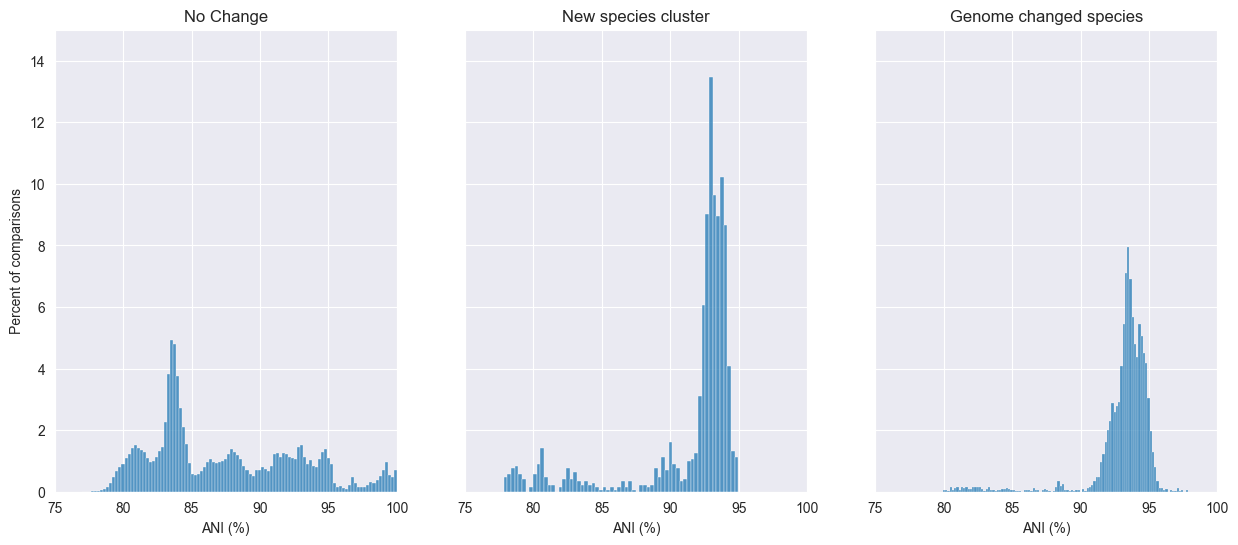

In [46]:
sns.histplot(new_clst)

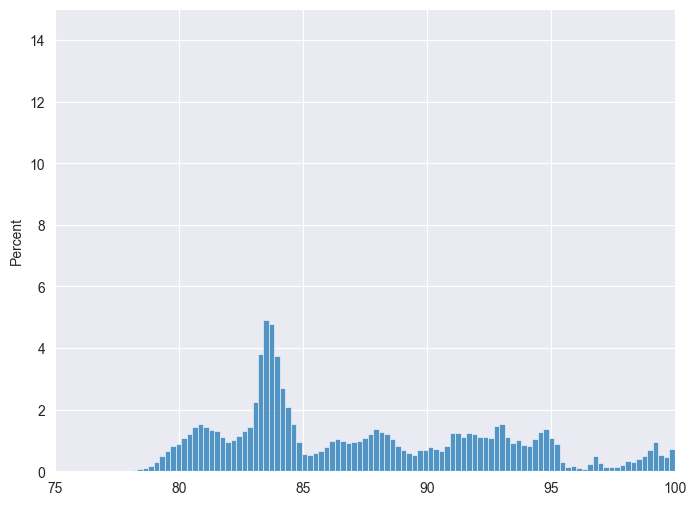

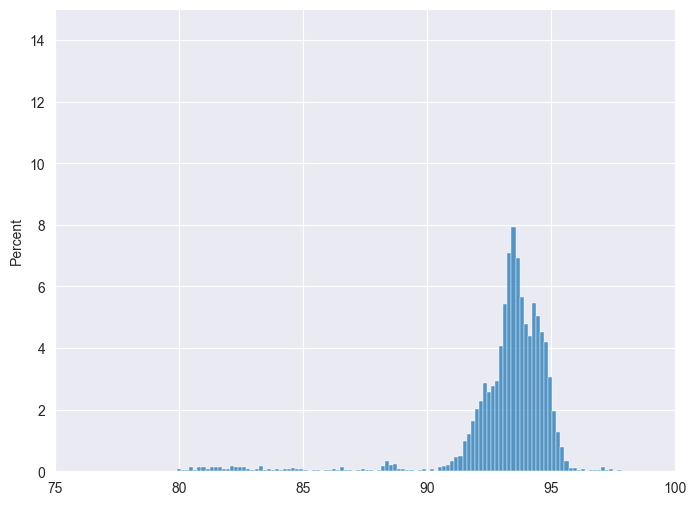

In [38]:
calc_sole_rep()